# StarKit Python3 Test Notebook

The first step is to load a spectral grid to work with. Using the open access grid from StarKit Collaboration (https://zenodo.org/record/2557923#.XFoc0KfMzYo)

In [5]:
from starkit.gridkit import load_grid
import pylab as plt
import matplotlib

In [6]:
grid = load_grid('phoenix_t4000_10000_w3000_9000_r3000.h5')
grid

[starkit.gridkit.base][INFO   ]  Reading index (base.py:266)
[starkit.gridkit.base][INFO   ]  Discovered columns teff, logg, mh (base.py:269)
[starkit.gridkit.base][INFO   ]  Reading Fluxes (base.py:272)
[starkit.gridkit.base][INFO   ]  Fluxes shape (688, 13184) (base.py:275)
[py.warnings         ][WARNING]  /Users/devinchu/anaconda2/envs/starkit_python3_test/lib/python3.7/site-packages/astropy/units/format/generic.py:474: UnitsWarning: 'erg/s/angstrom' contains multiple slashes, which is discouraged by the FITS standard
  core.UnitsWarning)
 (warnings.py:110)
[starkit.gridkit.base][INFO   ]  Initializing spec grid (base.py:309)
[starkit.gridkit.base][WARNING]  **** NO WAVELENGTH TYPE SET DEFAULTING TO GRID (vacuum) ****

 (base.py:75)


<SpectralGrid(teff=4000., logg=3., mh=0.)>

Text(0, 0.5, 'Flux')

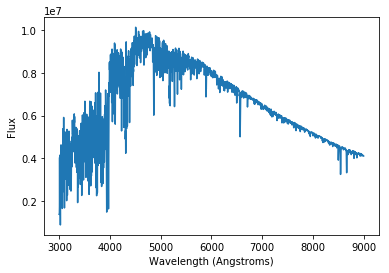

In [9]:
grid.teff = 5780.
grid.logg = 4.4
grid.mh = 0.0
wave, flux = grid()
plt.plot(wave, flux)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux')

In [11]:
from starkit.base.operations.stellar import DopplerShift, RotationalBroadening

Text(0, 0.5, 'Flux')

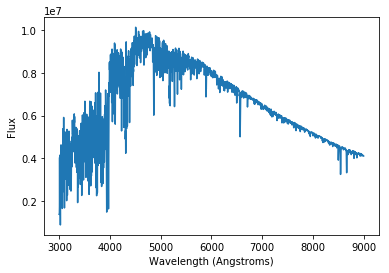

In [15]:
doppler = DopplerShift(vrad=0)
doppler.vrad = 20
new_wave, new_flux = doppler(wave, flux)
plt.plot(new_wave,new_flux)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux')

In [18]:
from starkit.base.operations.stellar import RotationalBroadening, CCM89Extinction
rotation = RotationalBroadening.from_grid(grid, vrot=200) # it is imperative to load from_grid here as it needs to
extinction = CCM89Extinction(a_v=1.0, r_v=3.1)
my_model = grid | rotation | doppler | extinction
my_model
my_model.param_names
my_model.vrot_1 = 300

In [20]:
from starkit import assemble_model
my_model = assemble_model(grid, vrad=20, a_v=0.3, vrot=300)
my_model.__class__

<class 'starkit.base.assemble_model.CompoundModel11'>
Name: CompoundModel11
Inputs: ()
Outputs: ('wavelength', 'flux')
Fittable parameters: ('teff_0', 'logg_0', 'mh_0', 'vrot_1', 'limb_darkening_1', 'vrad_2', 'a_v_3', 'r_v_3')
Expression: [0] | [1] | [2] | [3]
Components: 
    [0]: <SpectralGrid(teff=5780., logg=4.4, mh=0.)>

    [1]: <RotationalBroadening(vrot=300., limb_darkening=0.6)>

    [2]: <DopplerShift(vrad=20.)>

    [3]: <CCM89Extinction(a_v=0.3, r_v=3.1)>

In [22]:
assert 1==0

AssertionError: 